In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.cm import rainbow

In [ ]:
# Load and explore the dataset
H_data = pd.read_csv('heart_disease_data.csv')
print("Dataset Information:")
print(H_data.info())
print("\nDescriptive Statistics:")
print(H_data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean  

<Axes: >

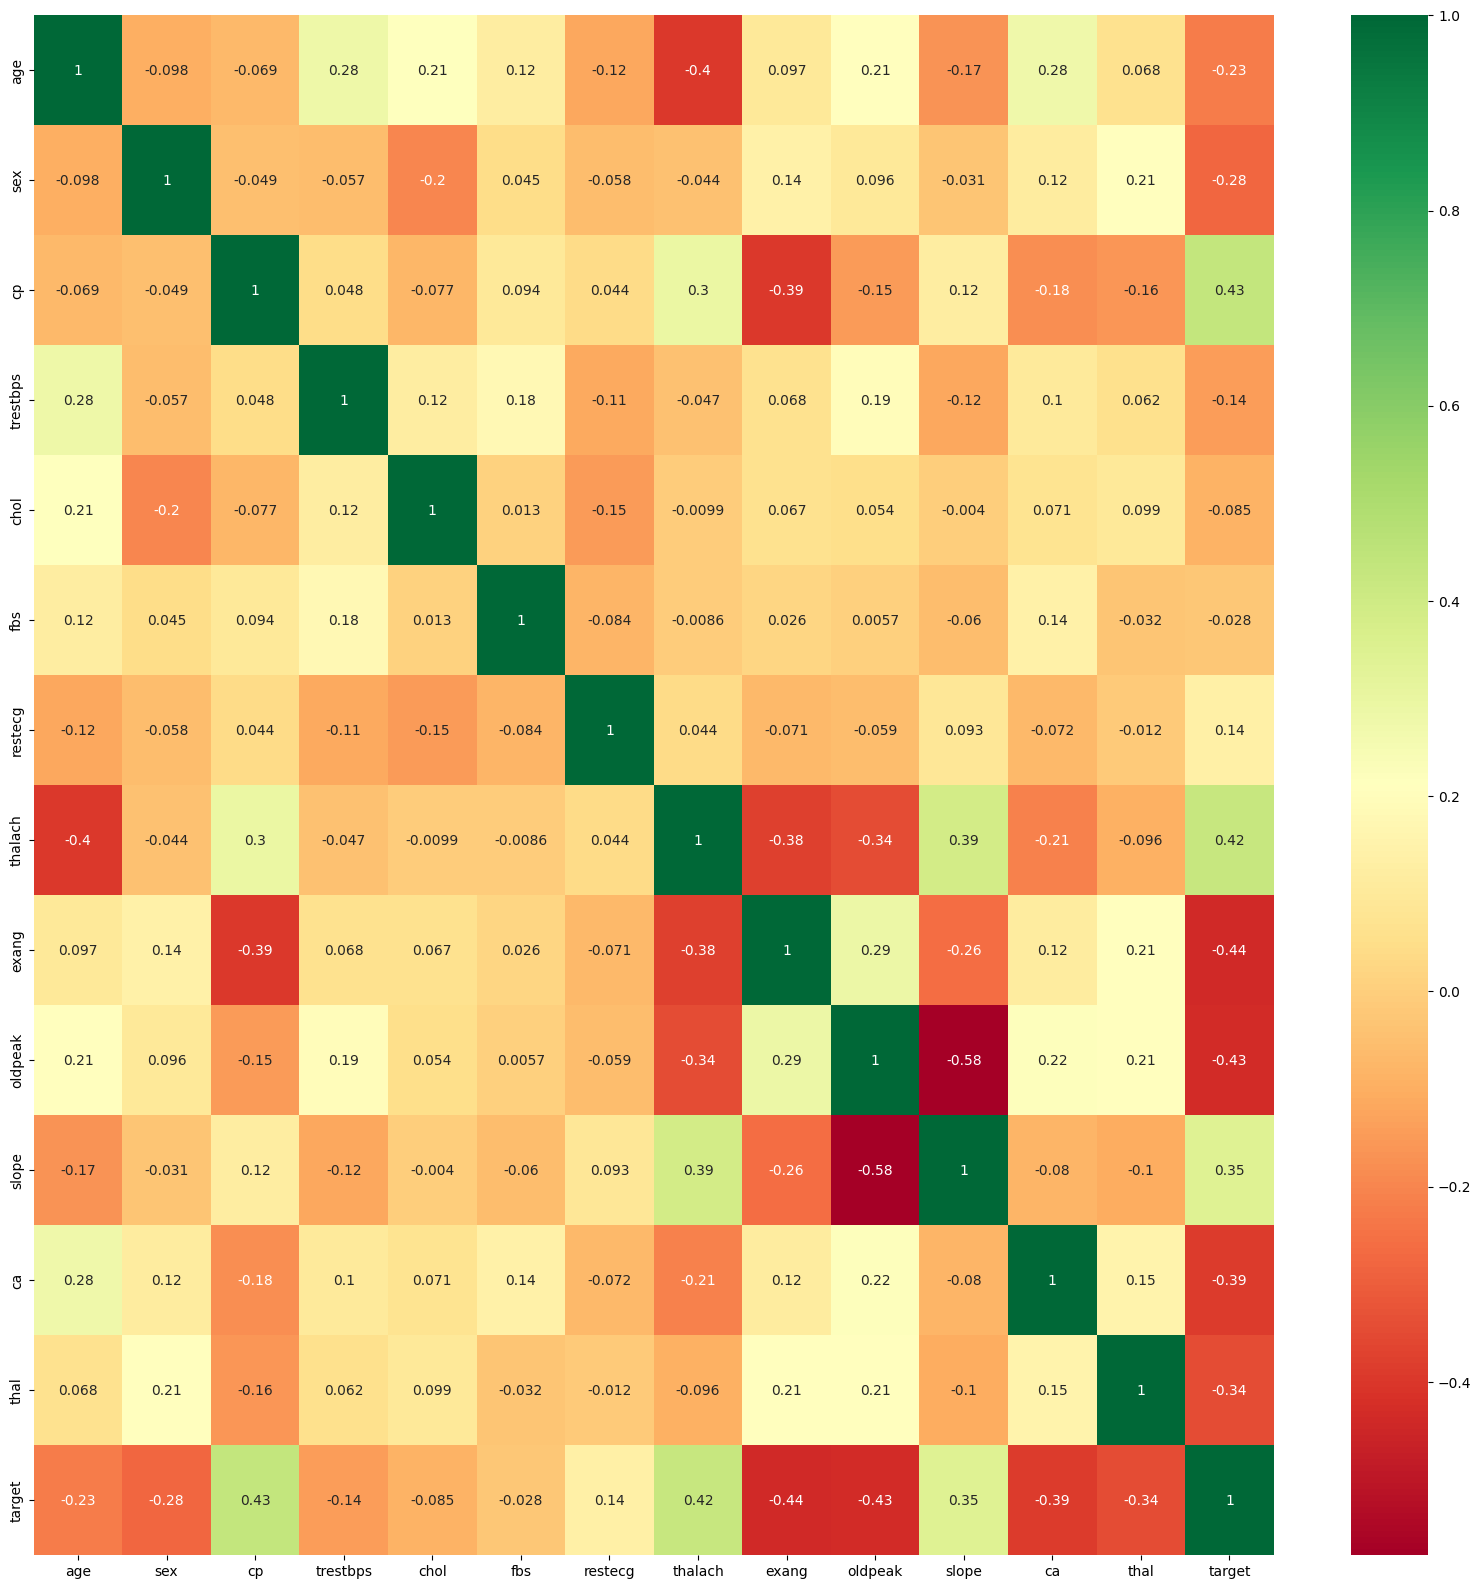

In [ ]:
# Visualize correlation matrix
corrmat = H_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(H_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

<Figure size 2000x1500 with 0 Axes>

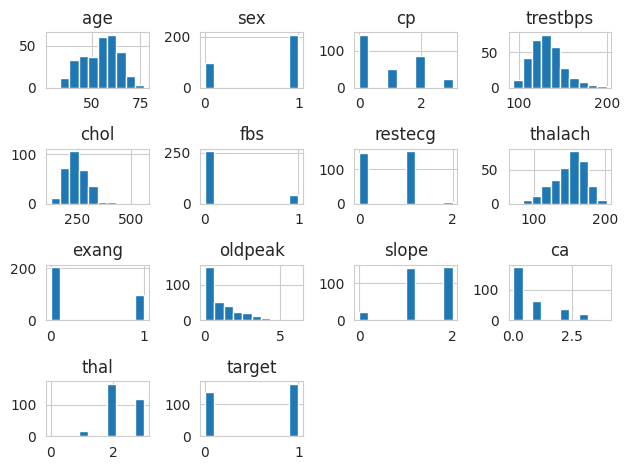

In [ ]:
# Visualize histograms for each feature
plt.figure(figsize=(20, 15))
H_data.hist()
plt.tight_layout()

<ipython-input-5-66495fb35c50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=H_data, palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

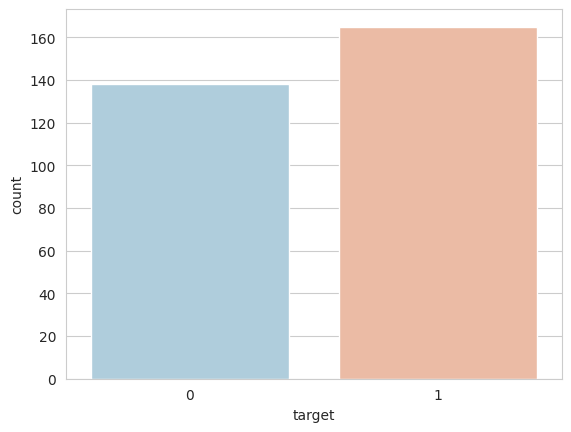

In [ ]:
# Explore target variable distribution
sns.set_style('whitegrid')
sns.countplot(x='target', data=H_data, palette='RdBu_r')

Data Preprocessing

In [ ]:
# One-hot encode categorical variables
dataset = pd.get_dummies(H_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
# Scale numeric features
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
# Split data into features and target variable
y = dataset['target']
X = dataset.drop(['target'], axis=1)

In [ ]:
# Model Evaluation for K-Nearest Neighbors
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

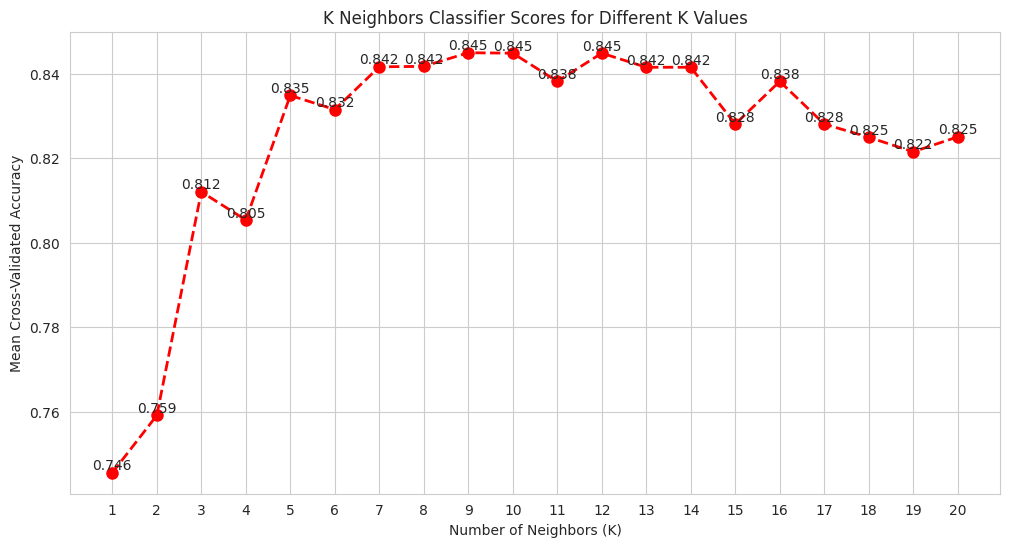

In [ ]:
plt.figure(figsize=(12, 6))

# Plot K-Nearest Neighbors scores
plt.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], f"{knn_scores[i - 1]:.3f}", ha='center', va='bottom')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('K Neighbors Classifier Scores for Different K Values')

plt.grid(True)

plt.show()

In [ ]:
# Select K value and calculate mean accuracy
knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_score_mean = cross_val_score(knn_classifier, X, y, cv=10).mean()
print(f"K-Nearest Neighbors Mean Accuracy: {knn_score_mean}")

K-Nearest Neighbors Mean Accuracy: 0.8448387096774195


In [ ]:
# Model Evaluation for Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=10)
rf_score_mean = cross_val_score(randomforest_classifier, X, y, cv=10).mean()
print(f"Random Forest Mean Accuracy: {rf_score_mean}")

Random Forest Mean Accuracy: 0.8186021505376344


In [ ]:
# Model Evaluation for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)

In [ ]:
# Calculate accuracy and perform cross-validation
accuracy = accuracy_score(y_test, y_pred)
logreg_score_mean = cross_val_score(logreg_classifier, X, y, cv=10).mean()
print(f"Logistic Regression Mean Accuracy: {logreg_score_mean}")

Logistic Regression Mean Accuracy: 0.8511827956989247
